In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd
import re

import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lodhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lodhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lodhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lodhi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df=pd.read_csv('NormalSituation.csv')
df2=pd.read_excel('pandemic_dataset.xlsx')
df=pd.concat([df, df2],axis=0)

In [3]:
def remove_special_characters(text):
    text=str(text).split('|')[-1]
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [4]:
df['reviews']=df['reviews'].apply(remove_special_characters)

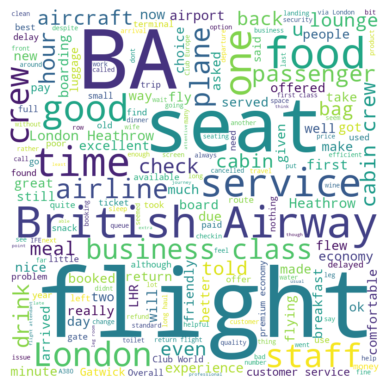

In [5]:
text=' '.join(df['reviews'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
def preprocess_text(text):
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


df['reviews'] = df['reviews'].apply(preprocess_text)



In [7]:
# vectorize text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['reviews'])

In [8]:

df['reviews']

0      flying world traveller plus premium service pr...
1      literally one worst experience havent airport ...
2      usual shambolic unfolding ba unfortunately com...
3      lost case took 6 week locate still replied 8 w...
4      incoming outgoing flight delayed french air tr...
                             ...                        
386    cologne gatwick economy class silver status ba...
387    tampa gatwick paid seat bumped business class ...
388    london heathrow madrid travel lhr regularly br...
389    _x000d_ london heathrow pisa return wife fly r...
390    edinburgh boston via london plane ancient need...
Name: reviews, Length: 3886, dtype: object

In [9]:
y=df['Recommended'].apply(lambda x: 1 if x=='yes' else 0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_features,y, test_size=0.2, random_state=42)


Check Samples of Both Class

<Axes: xlabel='Recommended', ylabel='count'>

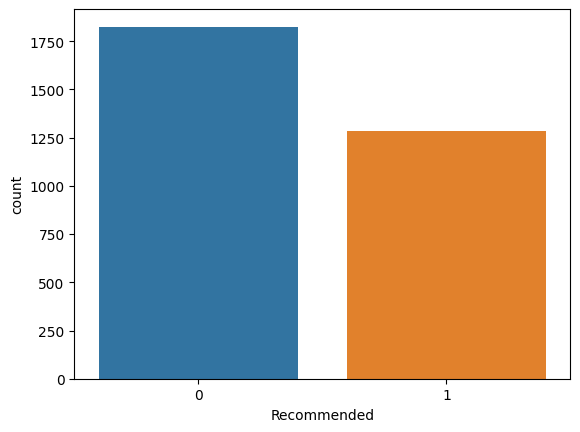

In [11]:
sns.countplot(x=y_train)

In [12]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

Check Samples of Both Class After using RandomUnderSampler

In [13]:
X_train, y_train = rus.fit_resample(X_train, y_train)

<Axes: xlabel='Recommended', ylabel='count'>

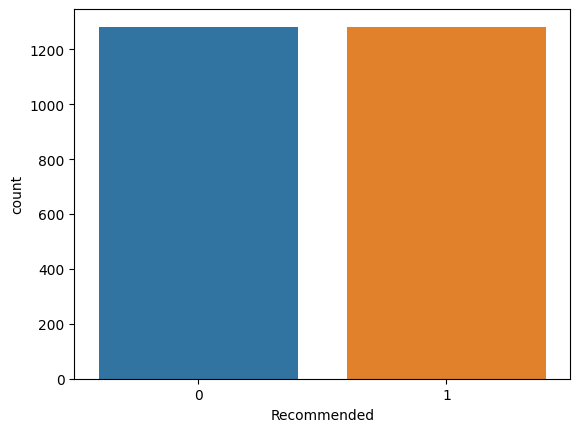

In [14]:
sns.countplot(x=y_train)

In [15]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [16]:
clf.score(X_test,y_test)

0.8804627249357326

In [17]:
dd='It was really  a great experience. i will definately want to travel again'
dd=preprocess_text(dd)
ff=tfidf_vectorizer.transform([dd])

Getting All predictions of X_test from Naive Bayes

In [18]:
NB_predications=clf.predict(X_test)

In [19]:
dd=df['reviews'].iloc[792]
dd=preprocess_text(dd)
ff=tfidf_vectorizer.transform([dd])

In [20]:
import tensorflow as tf

# define the TensorFlow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history=model.fit(X_train.toarray(), y_train, epochs=10, batch_size=64, validation_data=(X_test.toarray(), y_test))

# evaluate the model
loss, accuracy = model.evaluate(X_test.toarray(), y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
41/41 [==============================] - 1s 12ms/step - loss: 0.6466 - accuracy: 0.8079 - val_loss: 0.5750 - val_accuracy: 0.8856
Epoch 2/10
41/41 [==============================] - 0s 8ms/step - loss: 0.4893 - accuracy: 0.9166 - val_loss: 0.4424 - val_accuracy: 0.8959
Epoch 3/10
41/41 [==============================] - 0s 8ms/step - loss: 0.3463 - accuracy: 0.9415 - val_loss: 0.3586 - val_accuracy: 0.8959
Epoch 4/10
41/41 [==============================] - 0s 8ms/step - loss: 0.2524 - accuracy: 0.9548 - val_loss: 0.3057 - val_accuracy: 0.9023
Epoch 5/10
41/41 [==============================] - 0s 8ms/step - loss: 0.1881 - accuracy: 0.9657 - val_loss: 0.2784 - val_accuracy: 0.8959
Epoch 6/10
41/41 [==============================] - 0s 8ms/step - loss: 0.1456 - accuracy: 0.9751 - val_loss: 0.2602 - val_accuracy: 0.8972
Epoch 7/10
41/41 [==============================] - 0s 8ms/step - loss: 0.1137 - accuracy: 0.9817 - val_loss: 0.2481 - val_accuracy: 0.8997
Epoch 8/10
41/41 [=

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                877888    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 877,953
Trainable params: 877,953
Non-trainable params: 0
_________________________________________________________________


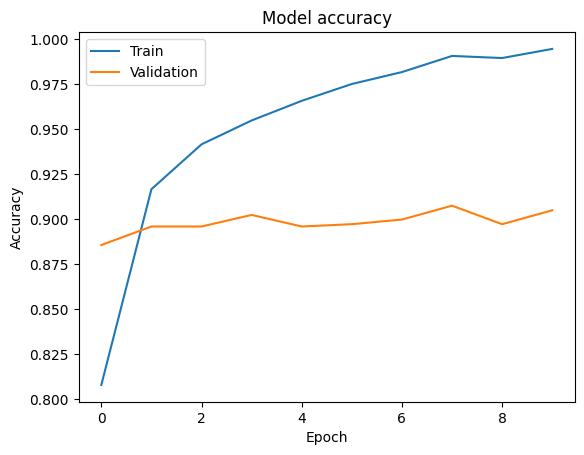

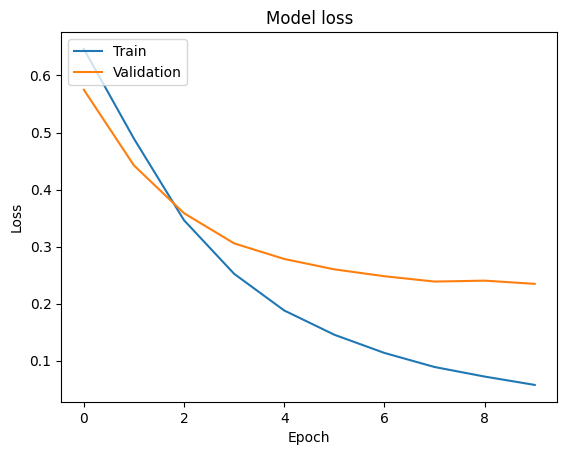

In [21]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
dd="I fly Aer Lingus semi regularly and always have a great experience. On our transatlantic flight to NYC the crew were excellent and couldn't do enough for us, the entertainment was great, the food was good and the seats as comfy as any plane seats I've sat on. Would highly recommend."
dd=preprocess_text(dd)
ff=tfidf_vectorizer.transform([dd])

In [23]:
model.predict(ff.toarray())

1/1 [==============================] - 0s 63ms/step


array([[0.9842764]], dtype=float32)

Getting All predictions of X_test from Neural Network

In [24]:
NN_predictions=model.predict(X_test.toarray())

25/25 [==============================] - 0s 1ms/step


Classificaiton Reports of Both Models

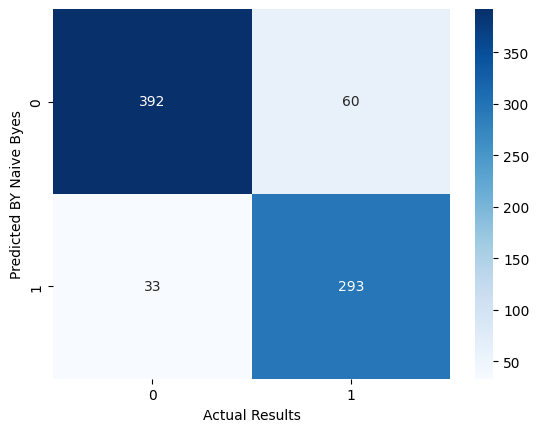

In [28]:
cm = confusion_matrix(y_test, NB_predications)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual Results')
plt.ylabel('Predicted BY Naive Byes')
plt.show()

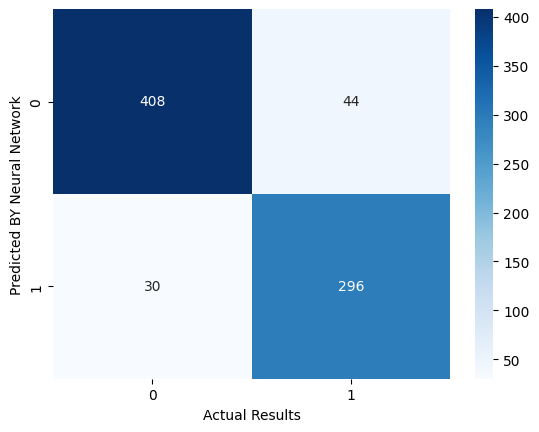

In [29]:
cm = confusion_matrix(y_test, np.round(NN_predictions.reshape(1,-1)[0]))

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual Results')
plt.ylabel('Predicted BY Neural Network')
plt.show()

From Above we Can see That Neural Network has performed Significantly well as compared to Naive Bayes Algorithm. It is also able to distinguish between both classes with more precision